In [5]:
import numpy as np
import itertools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import linregress

from nsm.cr_model import *

import time

# set plot parameters
params = {'legend.fontsize': 18,
          'figure.figsize': (8, 7),
          'axes.labelsize': 24,
          'axes.titlesize':24,
          'axes.linewidth':3,
          'xtick.labelsize':20,
          'ytick.labelsize':20,
          'xtick.labelsize':20,
          'ytick.labelsize':20}
plt.rcParams.update(params)
plt.style.use('seaborn-colorblind')
plt.rcParams['pdf.fonttype'] = 42

np.random.seed(123)

ModuleNotFoundError: No module named 'nsm.cr_model'

# Import data

In [ ]:
# import cdiff data
df = pd.read_csv("data/CR_data.csv")
df

,Treatments,Time,s1,s2,s3,s4,s5
0,Exp_0,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
1,Exp_0,11.111111,0.000000,0.000000,0.000000,0.000000,0.828642
2,Exp_0,22.222222,0.000000,0.000000,0.000000,0.000000,2.198987
3,Exp_0,33.333333,0.000000,0.000000,0.000000,0.000000,2.470573
4,Exp_0,44.444444,0.000000,0.000000,0.000000,0.000000,2.302236
...,...,...,...,...,...,...,...
305,Exp_30,55.555556,0.219339,0.324388,0.419622,0.655347,0.602117
306,Exp_30,66.666667,0.186326,0.296115,0.378478,0.584084,0.542701
307,Exp_30,77.777778,0.173135,0.258031,0.332925,0.529630,0.486013
308,Exp_30,88.888889,0.153854,0.232363,0.306518,0.473622,0.433287


In [ ]:
# id species names
species = df.columns.values[2:]
species

array(['s1', 's2', 's3', 's4', 's5'], dtype=object)

# Define function to make predictions on test data

In [ ]:
# Define function to make predictions on test data
def plot(model, df_test):
    all_treatments = df_test.Treatments.values
    unique_treatments = np.unique(all_treatments)
    numspecies = len(species)
    
    # save true values and predictions
    true = []
    pred = []
    stdv = []
    spcs = []

    # pull a random community trajectory
    for treatment in unique_treatments:
        comm_inds = np.in1d(df_test['Treatments'].values, treatment)
        comm_data = df_test.iloc[comm_inds].copy()

        # make sure comm_data is sorted in chronological order
        comm_data.sort_values(by='Time', ascending=True, inplace=True)
        tspan = comm_data.Time.values

        # pull just the community data
        output_true = comm_data[species].values

        # run model using parameters
        x_test = np.copy(output_true[0, :])
        
        # predict end-point measured values
        output, output_stdv, _ = model.predict(x_test, tspan)
        true.append(output_true[-1])
        pred.append(output[-1, :len(species)])
        stdv.append(output_stdv[-1, :len(species)])
        spcs.append(species)

        # increase teval
        t_eval = np.linspace(0, tspan[-1])
        steps = len(t_eval)
        output, output_stdv, resources = model.predict(x_test, t_eval)

        # plot the results
        plt.figure(figsize=(9, 6))
        ylim = 0
        for i, sp in enumerate(species):
            out = output[:,i]
            out_true = output_true[:, i]
            if out[0] > 0:
                plt.scatter(tspan, out_true, color='C{}'.format(i))
                plt.plot(t_eval, out, label=f"Predicted {sp}", color='C{}'.format(i))
                plt.fill_between(t_eval, out-output_stdv[:, i], out+output_stdv[:, i], color='C{}'.format(i), alpha=0.2)
                
        plt.xlabel("Time (hr)")
        plt.ylabel("Species abundance")
        plt.title(f"{treatment}")
        plt.show()
        
        # plot predictions of hidden variables
        for k, resource in enumerate(resources.T):
            plt.plot(t_eval, resource, label=f"Predicted R{k+1}", color=f'C{k+1}')

        plt.legend()
        plt.ylabel("Resource concentration")
        plt.xlabel("Time (hr)")
        plt.show()
        
    return np.concatenate(true), np.concatenate(pred), np.concatenate(stdv), np.concatenate(spcs)

# Fit model

In [ ]:
# init model 
model = CR(dataframe=df, species=species, n_r=2)

# fit to data 
t0 = time.time()
model.fit()
print("Elapsed time {:.2f}s".format(time.time()-t0))

Total samples: 144, Updated regularization: 1.00e-05
Loss: 67.847, Residuals: -0.259
Loss: 54.727, Residuals: -0.709
Loss: 35.536, Residuals: -0.569
Loss: 33.061, Residuals: -0.234
Loss: 28.582, Residuals: -0.210
Loss: 21.749, Residuals: -0.200
Loss: 16.843, Residuals: -0.291
Loss: 15.796, Residuals: -0.064
Loss: 15.621, Residuals: -0.031
Loss: 15.378, Residuals: -0.035
Loss: 15.372, Residuals: -0.021
Loss: 15.321, Residuals: -0.021
Loss: 15.264, Residuals: -0.027
Loss: 15.263, Residuals: -0.020
Loss: 8.739, Residuals: -0.094
Loss: 8.119, Residuals: 0.065
Loss: 6.953, Residuals: 0.086
Loss: 5.021, Residuals: 0.132
Loss: 4.749, Residuals: 0.029
Loss: 2.502, Residuals: 0.058
Loss: 1.727, Residuals: 0.053
Loss: 0.456, Residuals: -0.012
Loss: 0.327, Residuals: -0.002
Loss: 0.154, Residuals: -0.011
Loss: 0.132, Residuals: -0.011
Loss: 0.105, Residuals: -0.009
Loss: 0.099, Residuals: -0.009
Loss: 0.096, Residuals: -0.006
Loss: 0.096, Residuals: -0.006
Loss: 0.096, Residuals: -0.007
Loss: 0.0

In [ ]:
# params = np.concatenate([model.r0]+[p.ravel() for p in model.params])

# grad_fwd = model.jacobian_fwd(params)

# grad_adj = model.jacobian_adj(params)

# plt.scatter(np.array(grad_adj), np.array(grad_fwd))
# plt.show()

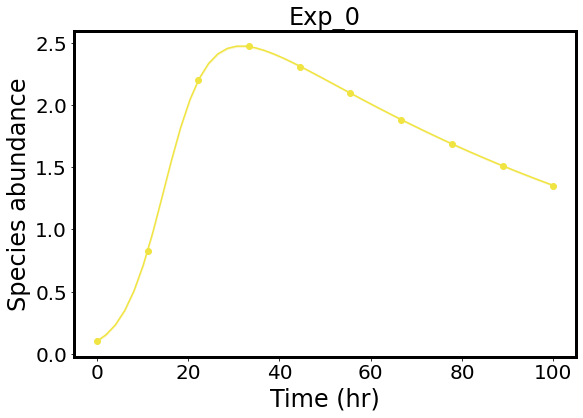

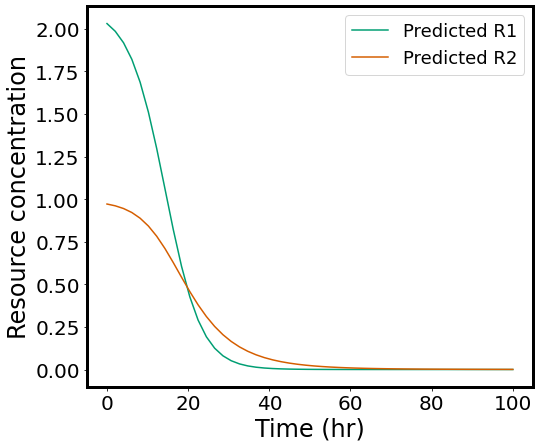

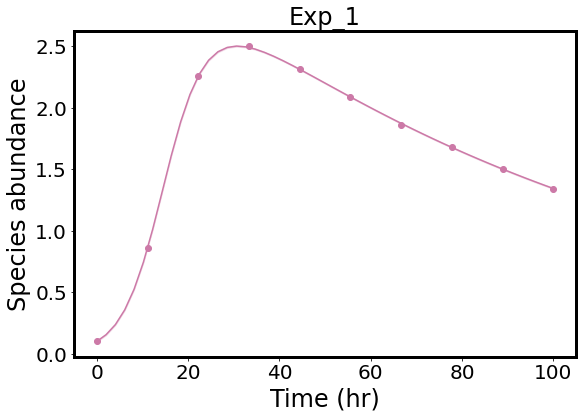

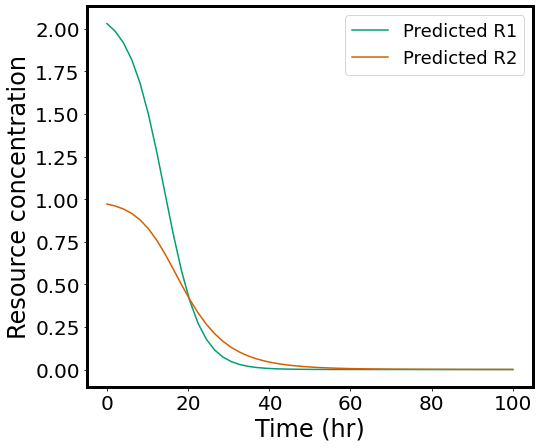

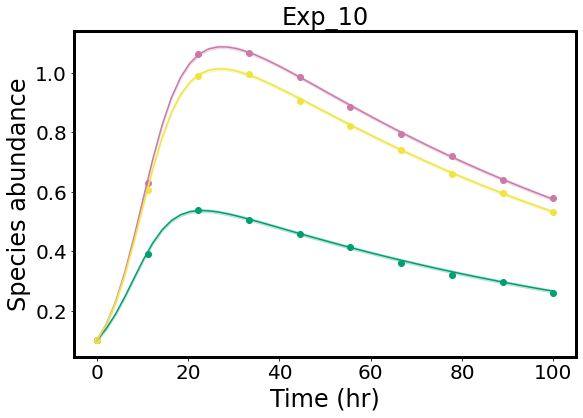

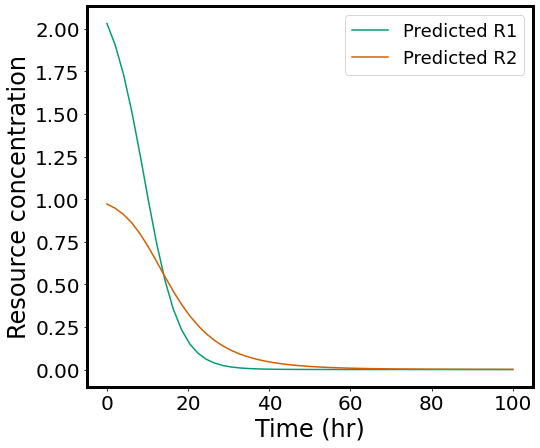

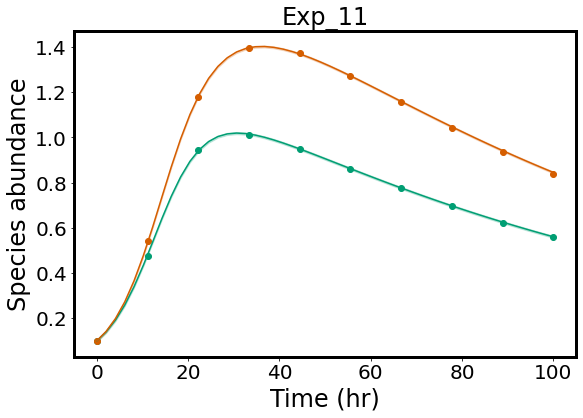

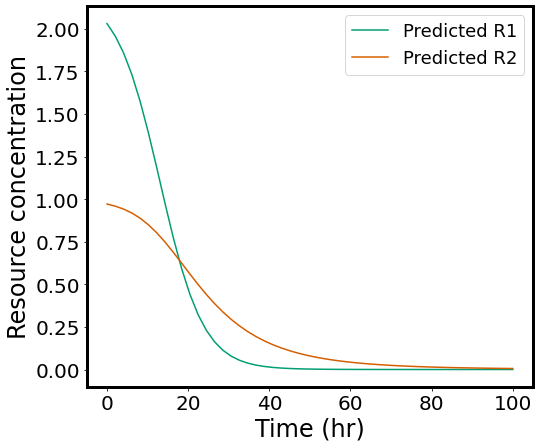

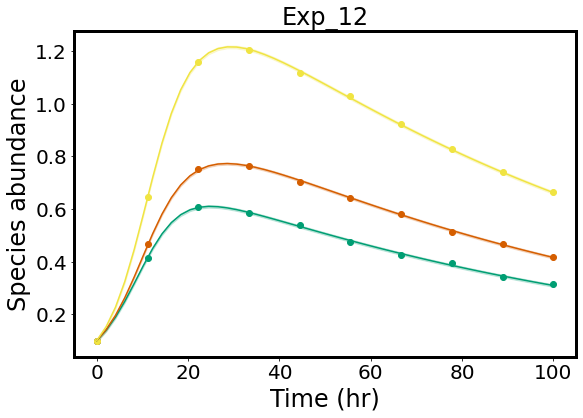

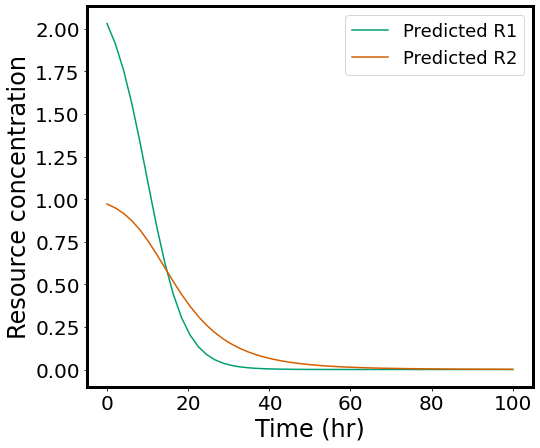

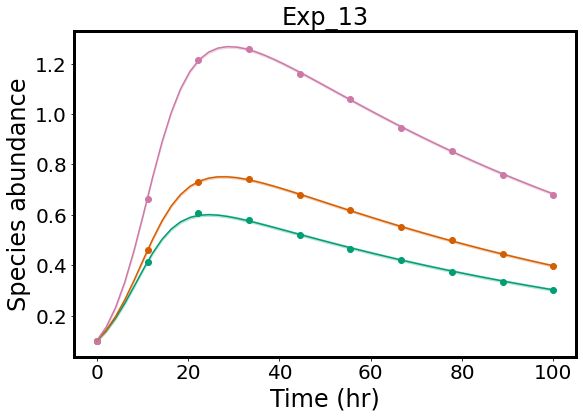

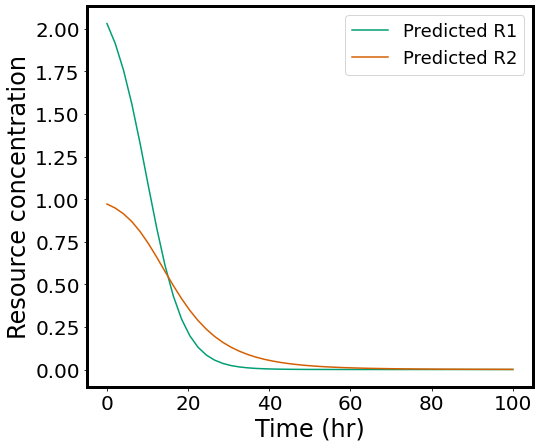

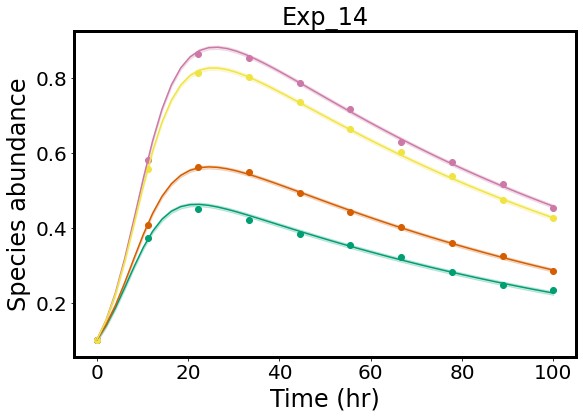

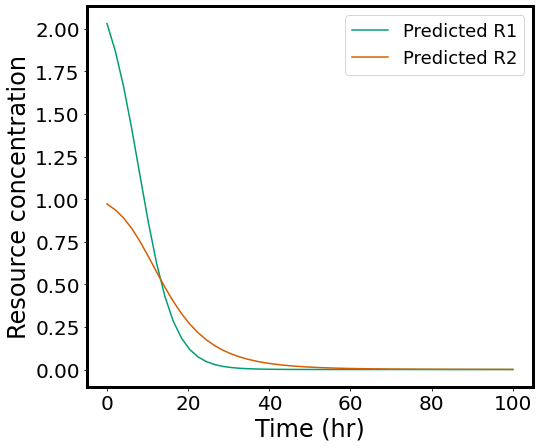

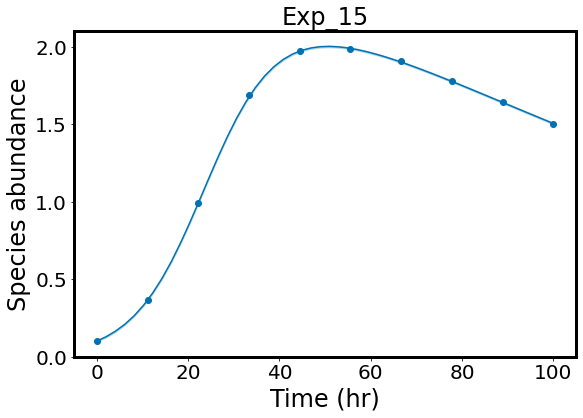

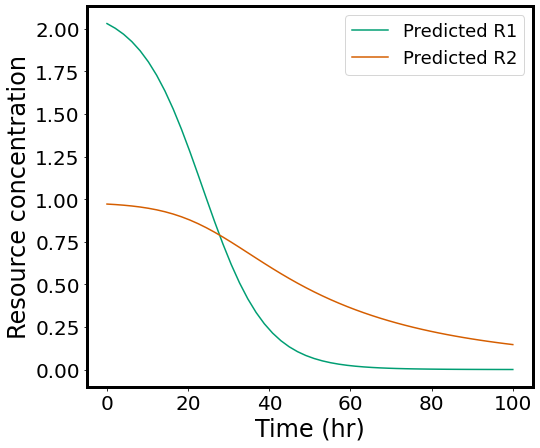

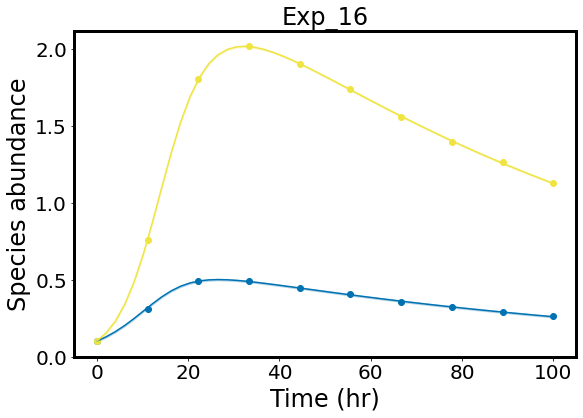

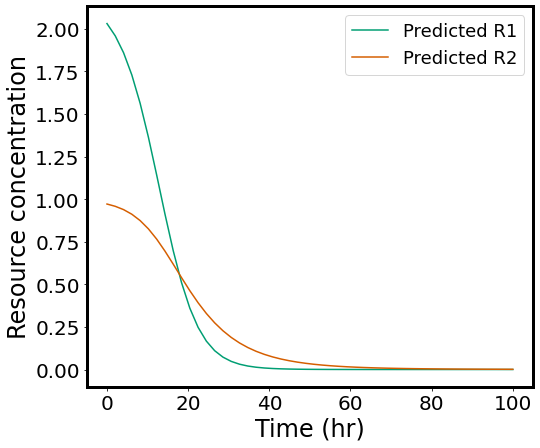

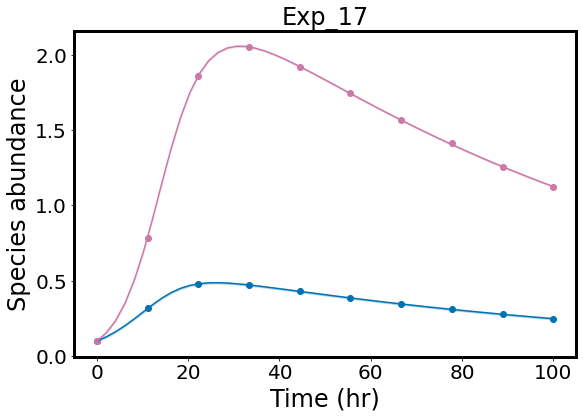

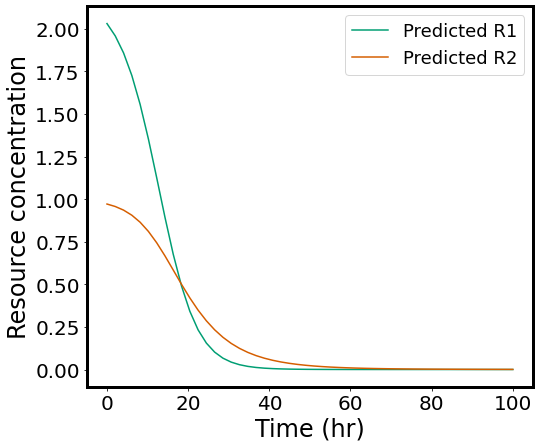

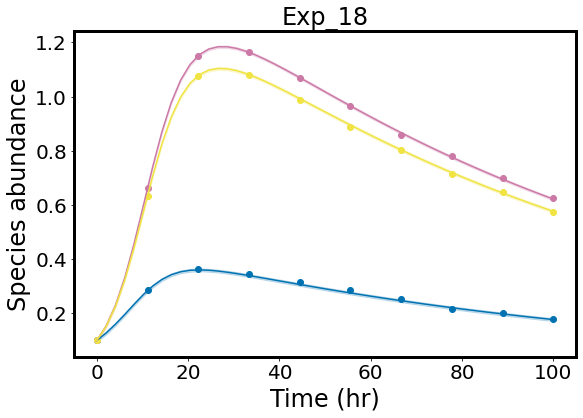

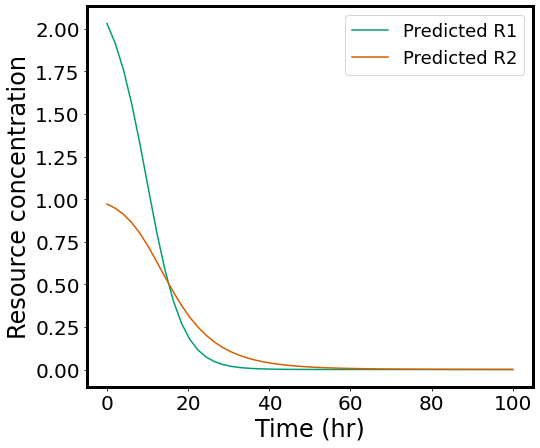

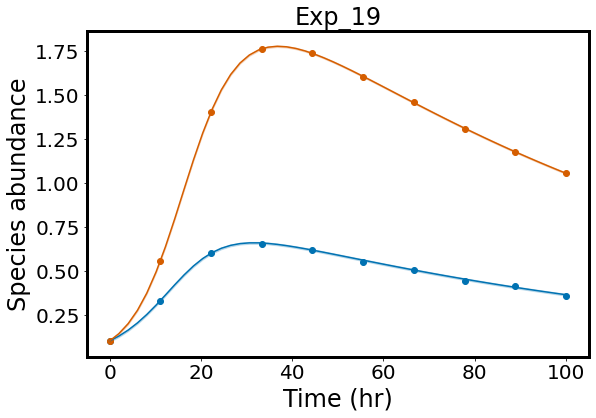

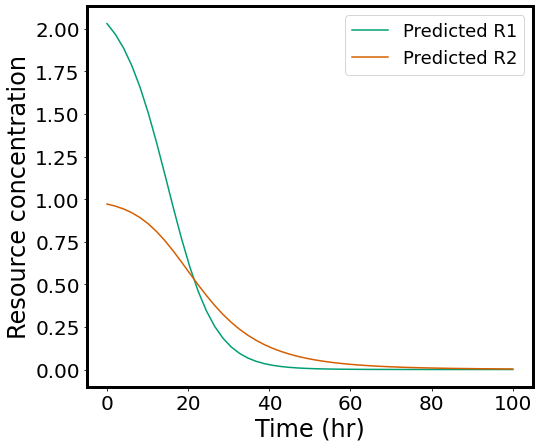

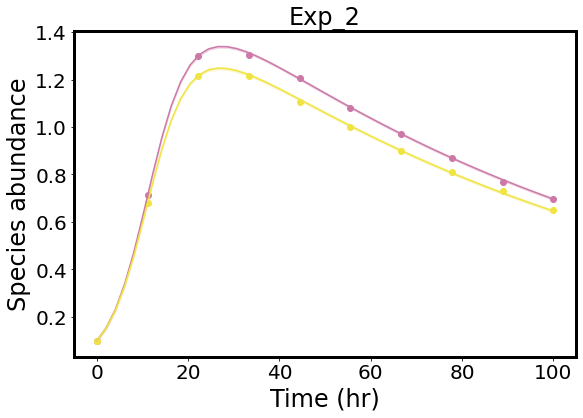

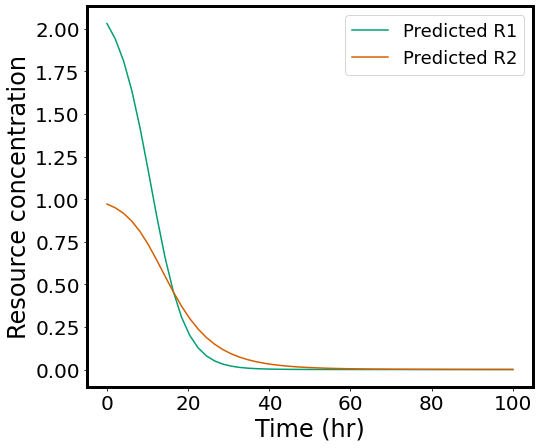

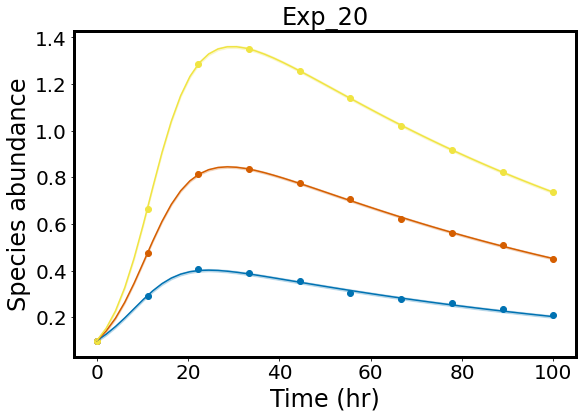

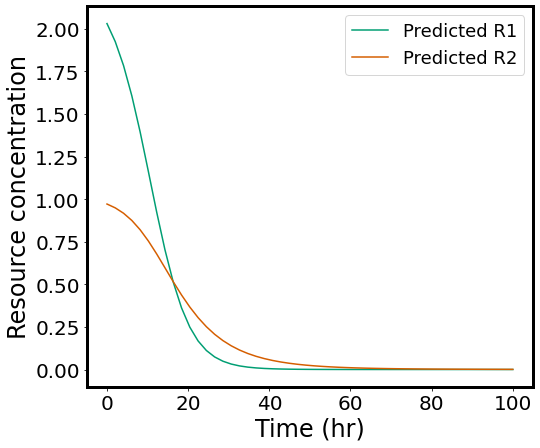

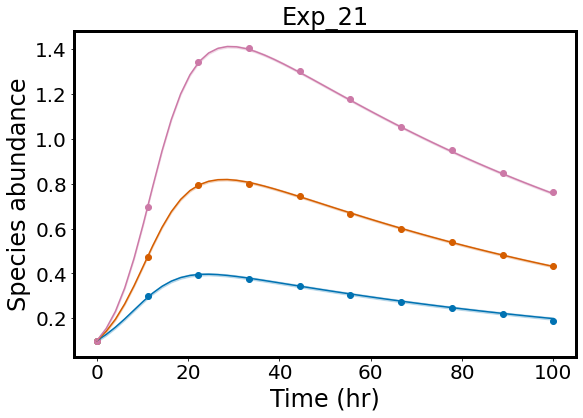

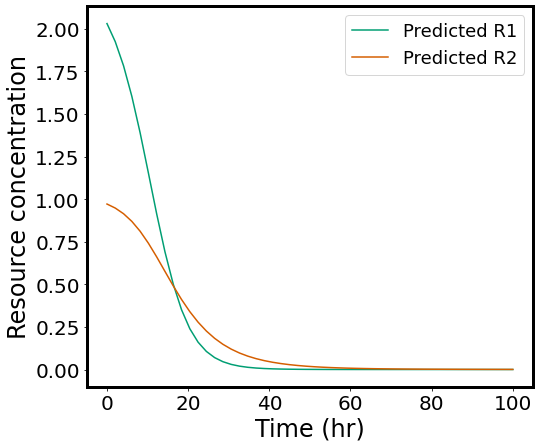

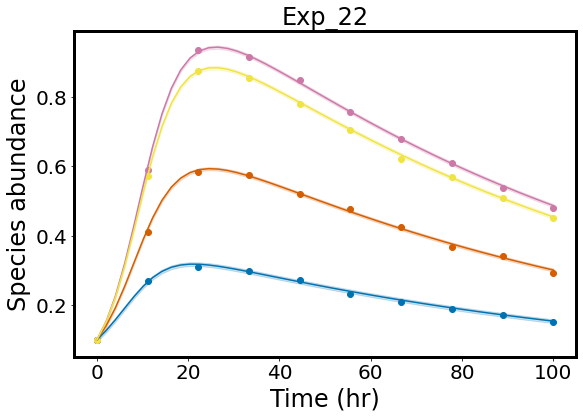

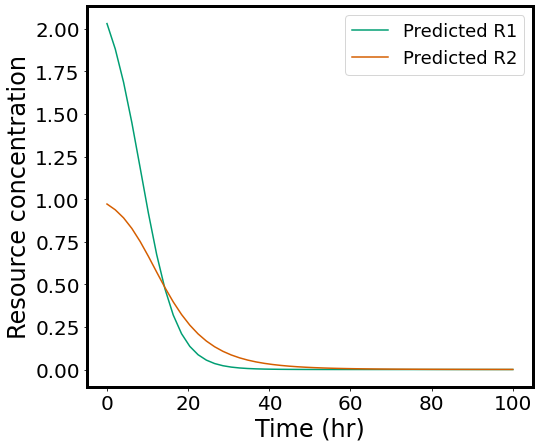

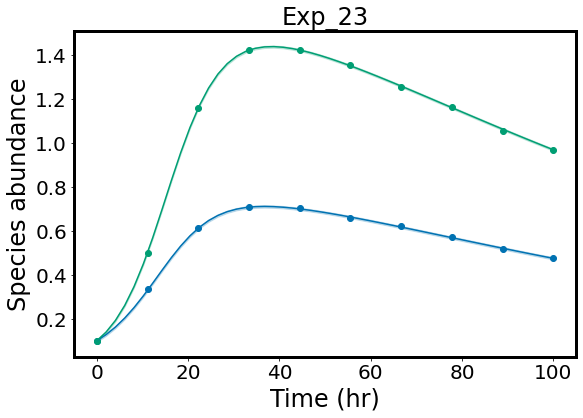

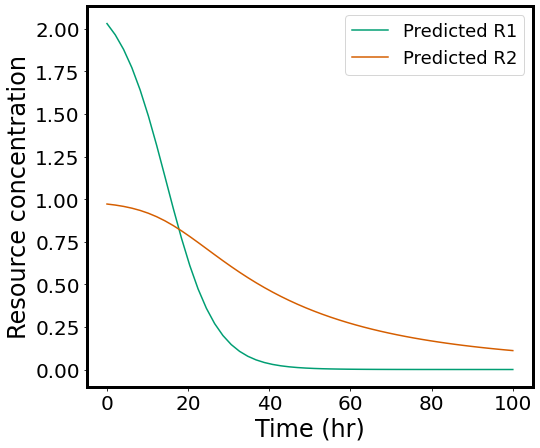

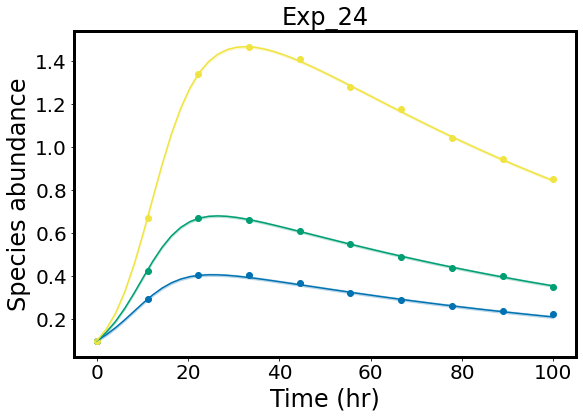

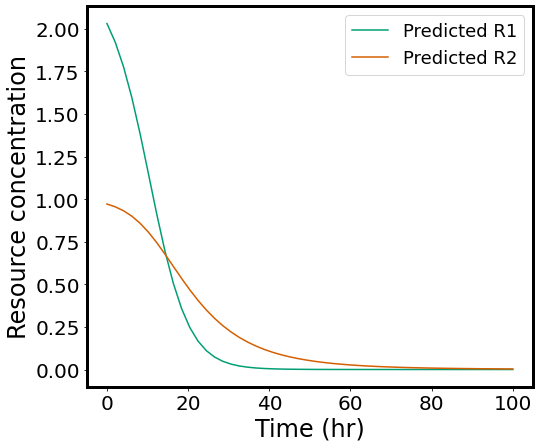

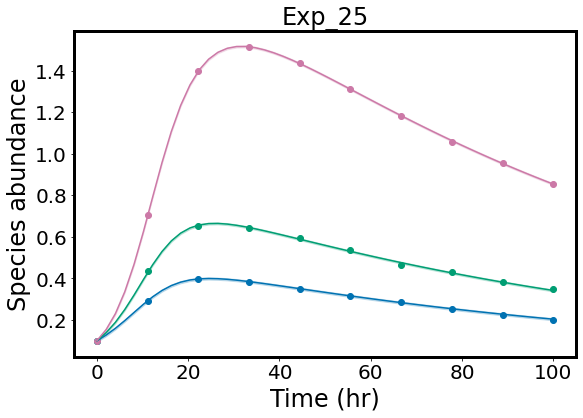

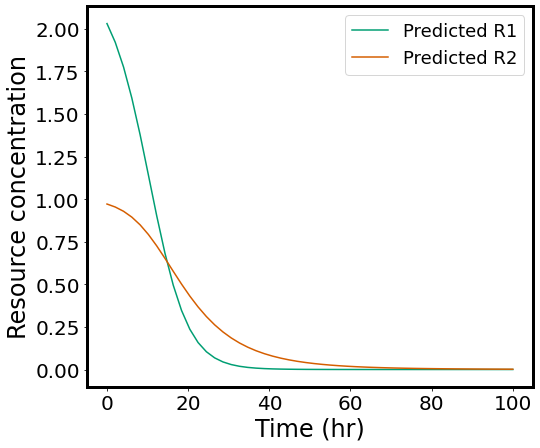

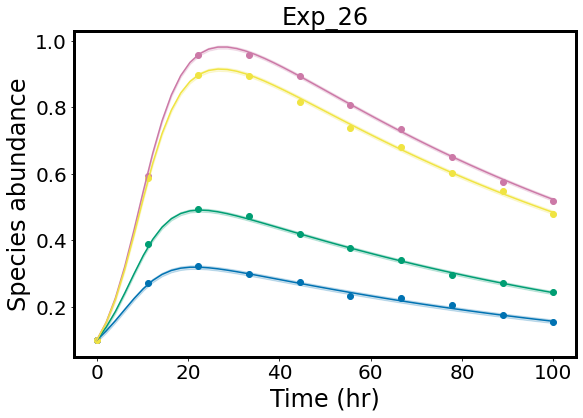

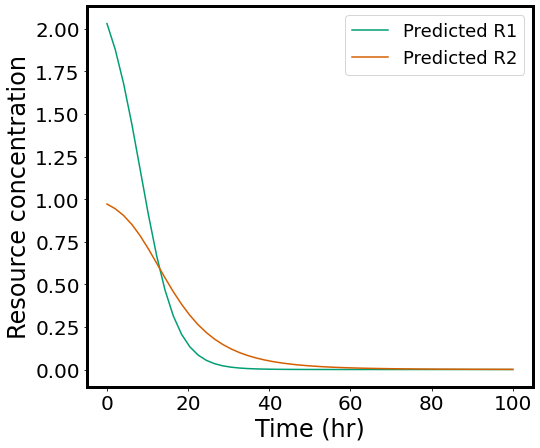

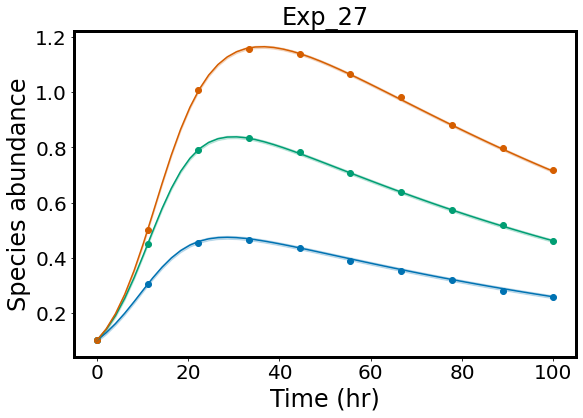

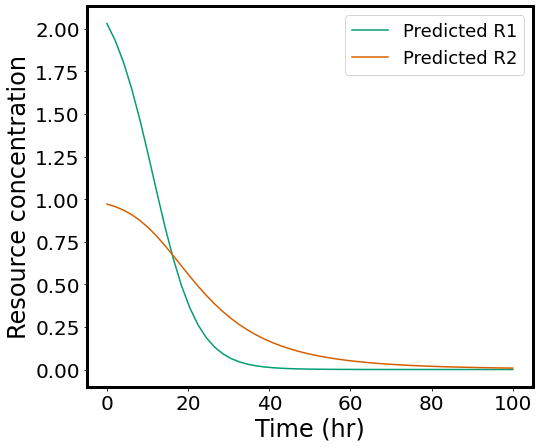

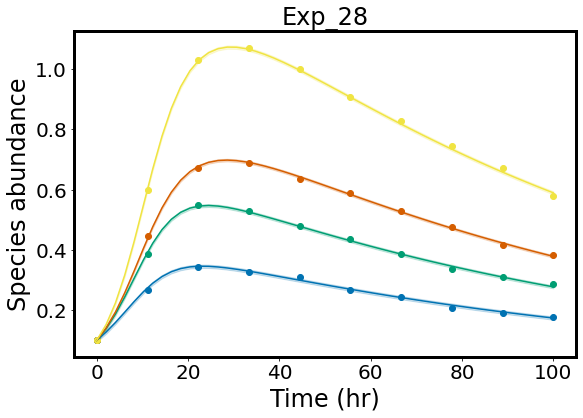

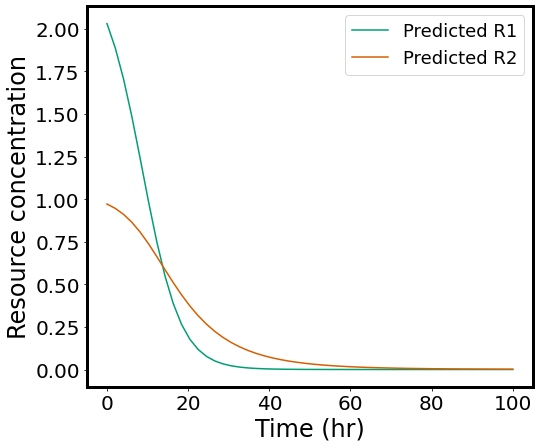

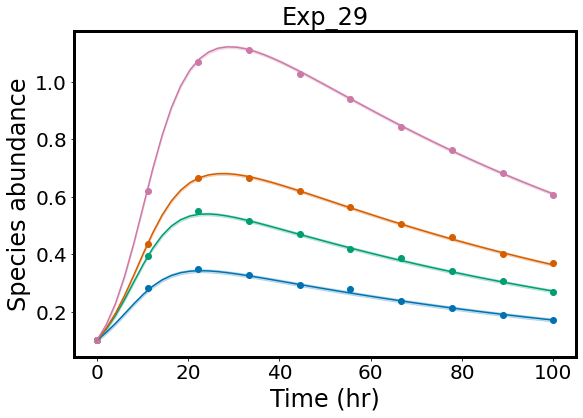

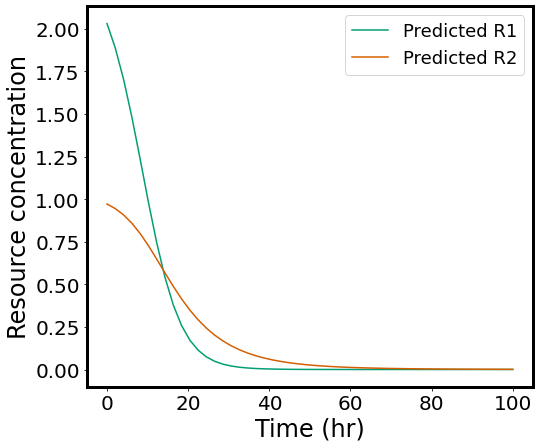

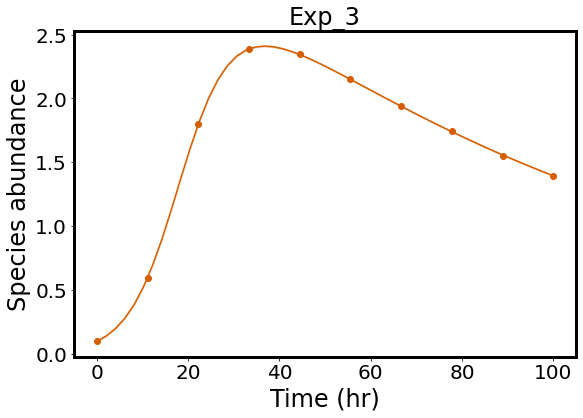

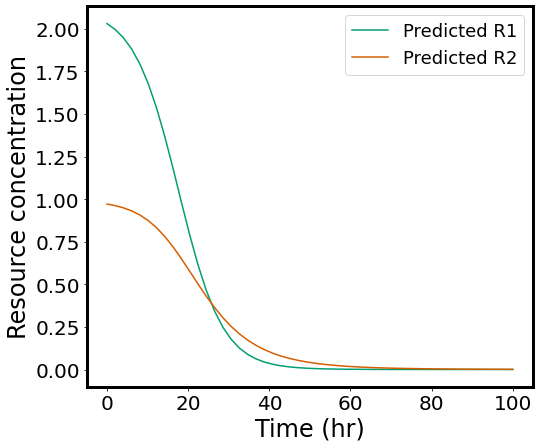

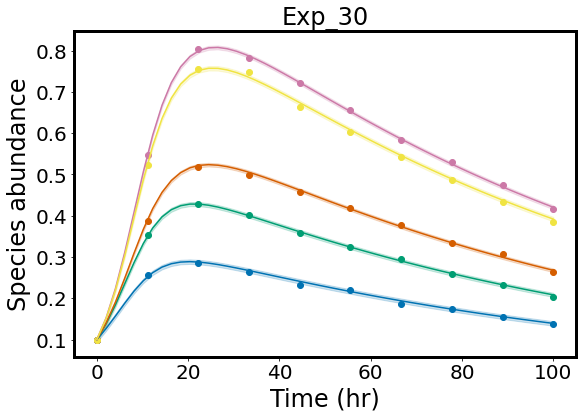

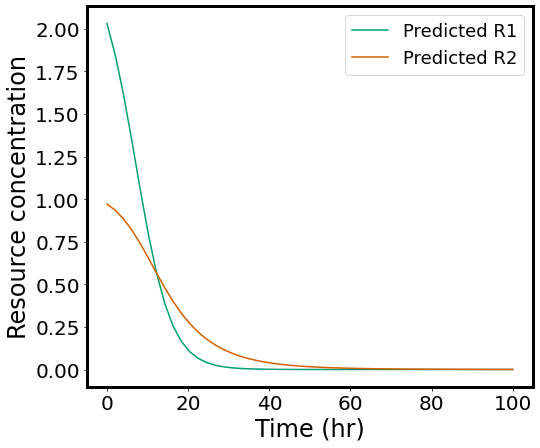

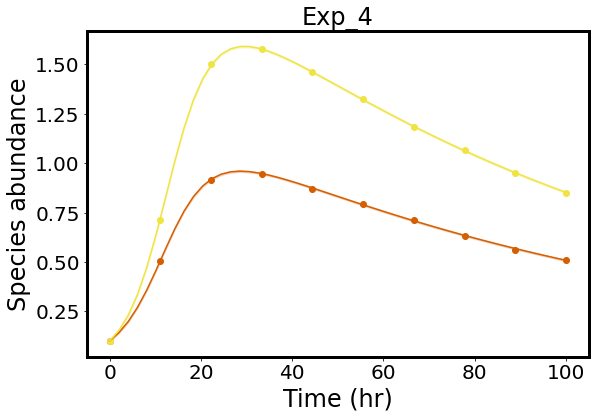

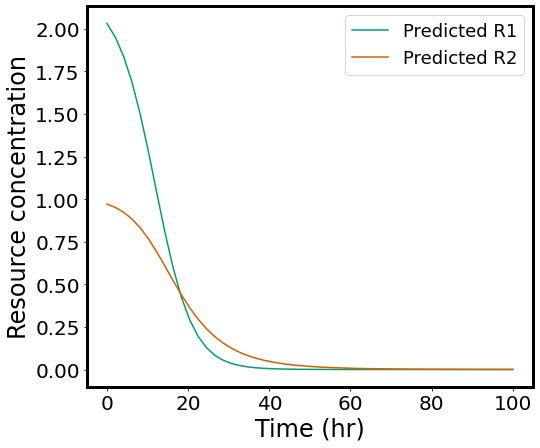

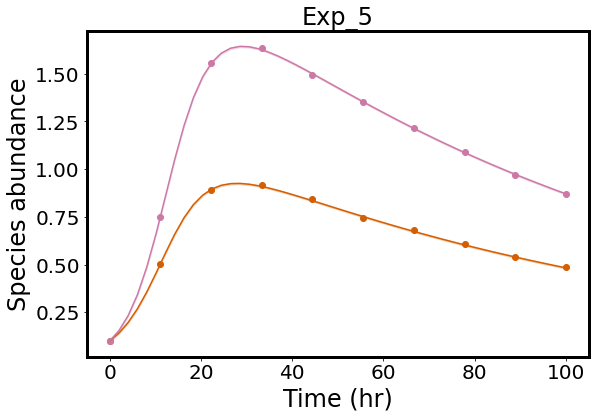

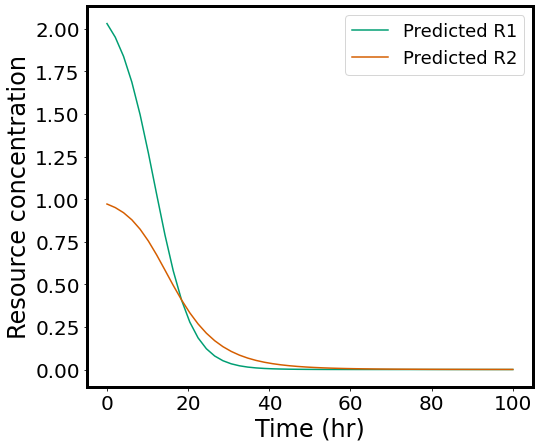

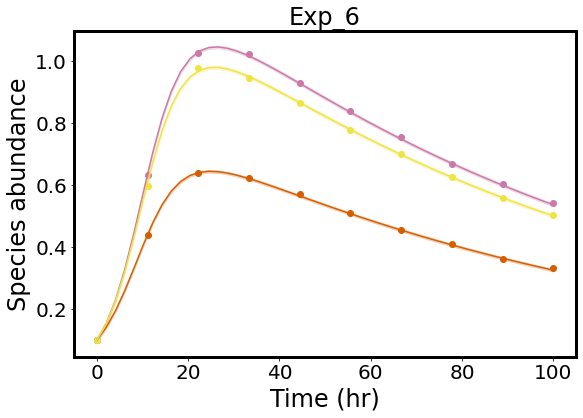

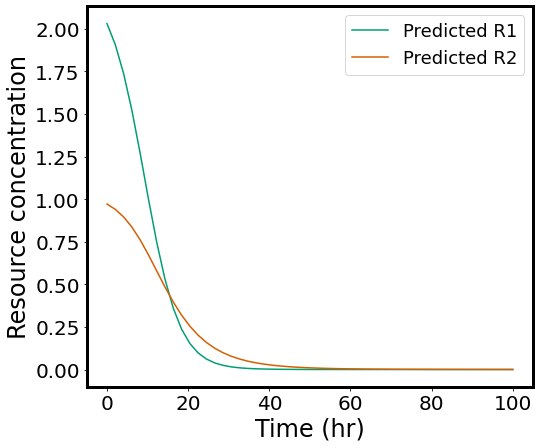

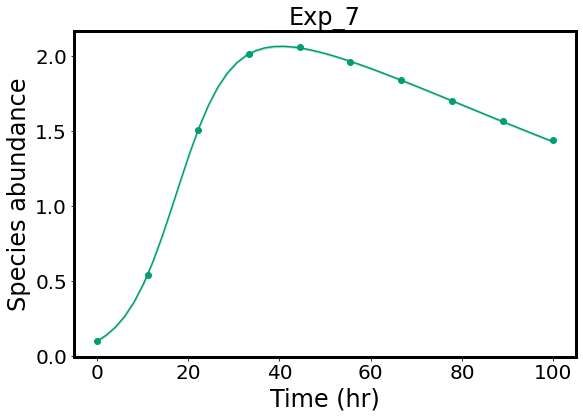

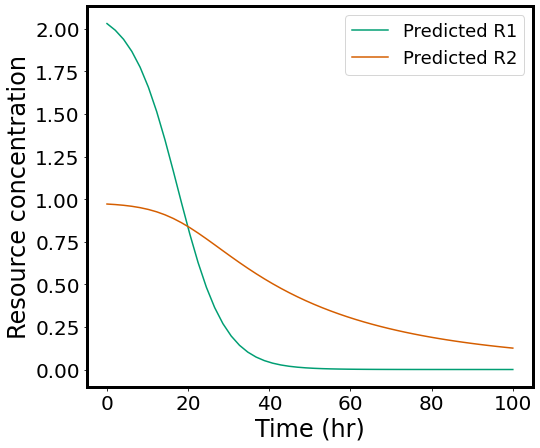

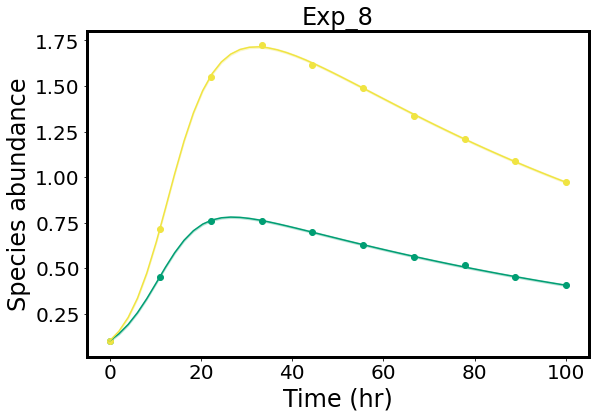

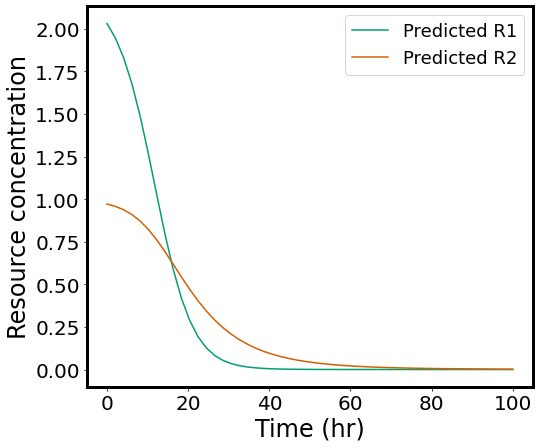

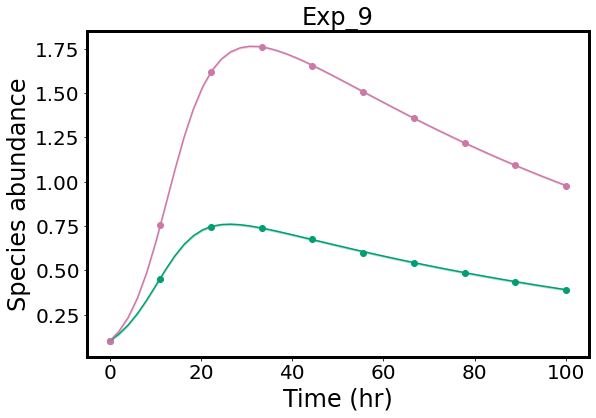

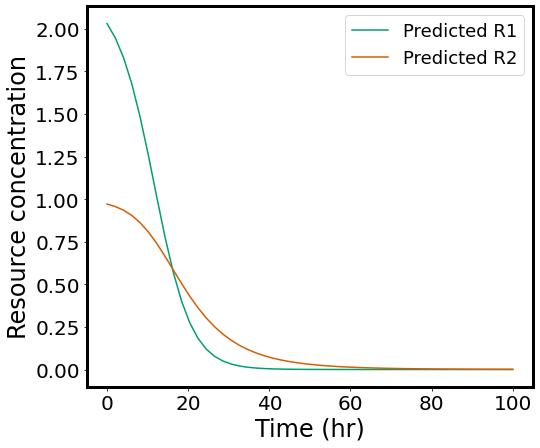

In [ ]:
# plot fit 
true, pred, stdv, spcs = plot(model, df)

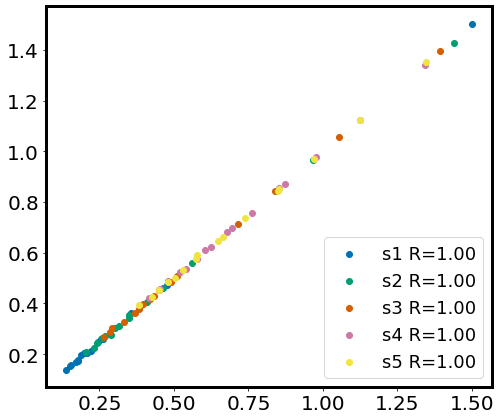

In [ ]:
for i,sp in enumerate(np.unique(spcs)):
    sp_inds = spcs == sp
    inds_pos = true[sp_inds] > 0
    
    R = linregress(true[sp_inds][inds_pos], pred[sp_inds][inds_pos]).rvalue
    plt.scatter(true[sp_inds][inds_pos], pred[sp_inds][inds_pos], c=f"C{i}", label=sp + " R={:.2f}".format(R))
plt.legend(loc="lower right")
plt.show()

In [ ]:
log_d, log_C = model.params

In [ ]:
np.exp(model.r0)

array([2.0304615, 0.9712892], dtype=float32)

In [ ]:
np.exp(log_d)

array([0.00995005, 0.00997078, 0.01003588, 0.01002063, 0.01000353],
      dtype=float32)

In [ ]:
np.exp(log_C)

array([[0.05906422, 0.08019388, 0.07165016, 0.08884569, 0.08876103],
       [0.01296698, 0.01317518, 0.03957655, 0.04729224, 0.04285647]],
      dtype=float32)